### Multi Task LASSO

In [1]:
import sys
import itertools

from tqdm import tqdm

import numpy as np

import matplotlib.pyplot as plt

sys.path.append("..")
import helper.helper as h

from sklearn.linear_model import MultiTaskLasso

### Generate Data
We generate $\texttt{T}$ samples with a dense weighted adjacency matrix $W$. For simplicity, we do not permute $W$, as this would only switch around some rows and columns.

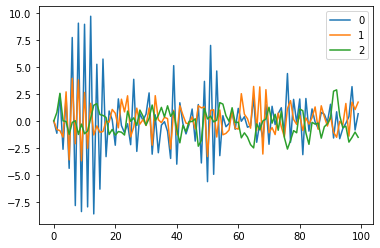

A:
[[-0.75  0.    0.  ]
 [-0.62 -0.67  0.  ]
 [-0.61 -0.64  0.68]]

P:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]].

W:
[[-0.75  0.    0.  ]
 [-0.62 -0.67  0.  ]
 [-0.61 -0.64  0.68]]


In [19]:
np.random.seed(seed = 123)

## Number of dimensions, number of edges, number of samples
T, n, s = 100, 3, 6

## Coefficient matrix
A_true = h.generate_A(n, s, tril = False, low = 0.5, high = 0.75)

## True permutation
P_true = np.identity(n) # np.random.permutation(np.identity(n))

## True WAM
W_true = P_true.T @ A_true @ P_true

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plots = plt.plot(X);
plt.legend(plots, [i for i in range(n)], loc=1)
plt.show()

# get X value and X prediction
X_val = X[1:]
X_pred = X[:-1]

print(f"A:\n{np.round(A_true, 2)}\n\nP:\n{P_true}.\n\nW:\n{np.round(W_true, 2)}")

### Fit MultiClassLasso

In [25]:
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X_pred, X_val).coef_.T
print(coef_multi_task_lasso_)

[[-0.74703339 -0.12448137  0.00093029]
 [-0.22464968 -0.17045651 -0.00787837]
 [-0.07032005 -0.06696725  0.06124149]]


### Conclusion
I thought that this would be beneficial as we estimate a full matrix at the same time. However, upon reading the documentation more properly, it is stated the selected features are the same for all the regression problems, also called tasks, hence, we either have a 0 row, or a full row.